## “Statlog” датасет выданных кредитов

In [95]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import fetch_openml

sklearn.set_config(transform_output="pandas")

german_credit = fetch_openml(data_id=31, as_frame=True, parser="pandas")
X, y_cat = german_credit.data, german_credit.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   int64   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   int64   
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   int64   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   int64   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   int64   
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [97]:
X.tail()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,4,real estate,31,none,own,1,unskilled resident,1,none,yes
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,4,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,4,car,38,none,own,1,skilled,1,none,yes
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,4,no known property,23,none,for free,1,skilled,1,yes,yes
999,0<=X<200,45,critical/other existing credit,used car,4576,100<=X<500,unemployed,3,male single,none,4,car,27,none,own,1,skilled,1,none,yes


In [99]:
y_cat.value_counts()

class
good    700
bad     300
Name: count, dtype: int64

In [101]:
y = np.where(y_cat == 'bad', 1, 0)
y.mean()

0.3

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector


ct = ColumnTransformer([
      ('scale', StandardScaler(),
      make_column_selector(dtype_include=np.number)),
      ('onehot',
      OneHotEncoder(drop = 'if_binary', sparse_output=False),
      make_column_selector(dtype_exclude = np.number))
      ]).set_output(transform='pandas')

ct.fit_transform(X)

,scale__duration,scale__credit_amount,scale__installment_commitment,scale__residence_since,scale__age,scale__existing_credits,scale__num_dependents,onehot__checking_status_0<=X<200,onehot__checking_status_<0,onehot__checking_status_>=200,...,onehot__other_payment_plans_stores,onehot__housing_for free,onehot__housing_own,onehot__housing_rent,onehot__job_high qualif/self emp/mgmt,onehot__job_skilled,onehot__job_unemp/unskilled non res,onehot__job_unskilled resident,onehot__own_telephone_yes,onehot__foreign_worker_yes
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


Строки матрицы ошибок содержат количество истинных элементов каждого класса, а столбцы содержат количество прогнозируемых элементов каждого классаклассов.   
Внимание! Здесь мы рассматриваем "плохой" класс как положительный (вторая строка и столбец).

Инструменты подбора лучшей модели  в Scikit-learn предполагают, что мы всегда следуем аксиоме о том, что "выше" означает "лучше", поэтому следующая матрица ошибок присваивает отрицательные выигрыши (затраты) двум видам ошибок прогнозирования:
- выигрыш в -1 за каждый ложноположительный результат ("хороший" кредит помечен как "плохой"),
- выигрыш в -5 за каждый ложноотрицательный результат ("плохой" кредит помечен как "хороший"),

Истинным положительным и истинным отрицательным значениям этого показателя присваивается нулевой прирост.

In [113]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, make_scorer

pos_label, neg_label = 1, 0

def fpr_score(y, y_pred, neg_label, pos_label):
    cm = confusion_matrix(y, y_pred, labels=[neg_label, pos_label])
    tn, fp, _, _ = cm.ravel()
    tnr = tn / (tn + fp)
    return 1 - tnr

tpr_score = recall_score  # TPR and recall are the same metric

scoring = {
    "precision": make_scorer(precision_score, pos_label=pos_label),
    "recall": make_scorer(recall_score, pos_label=pos_label),
    "fpr": make_scorer(fpr_score, neg_label=neg_label, pos_label=pos_label),
    "tpr": make_scorer(tpr_score, pos_label=pos_label),
}

def credit_gain_score(y, y_pred, neg_label, pos_label):
    cm = confusion_matrix(y, y_pred, labels=[neg_label, pos_label])
    gain_matrix = np.array(
        [
            [0, -1],  # -1 gain for false positives
            [-5, 0],  # -5 gain for false negatives
        ]
    )
    return np.sum(cm * gain_matrix)


scoring["credit_gain"] = make_scorer(
    credit_gain_score, neg_label=neg_label, pos_label=pos_label
)
scoring["credit_gain"]

make_scorer(credit_gain_score, response_method='predict', neg_label=0, pos_label=1)

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [174]:
from sklearn.svm import SVC


model = make_pipeline(ct, SVC(probability=True)).fit(X_train, y_train)  ### ОБСУДИТЬ для SVC !!!!
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14ab15bb0>),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14ab16a20>)])),
                ('svc', SVC(probability=True))])

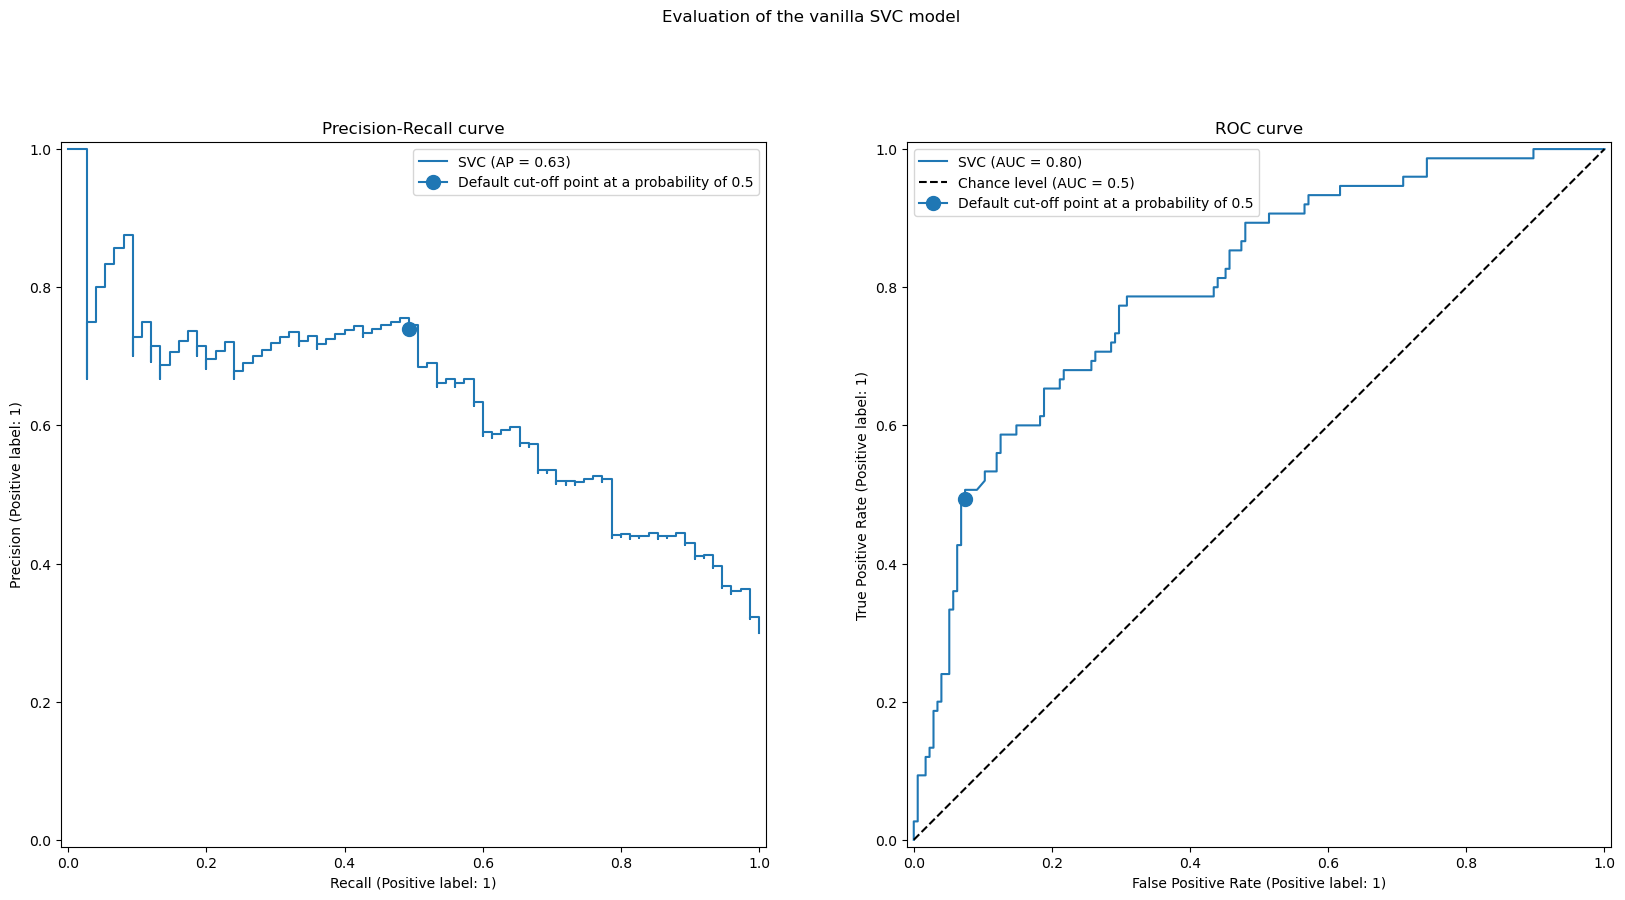

In [176]:
import matplotlib.pyplot as plt

from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, pos_label=pos_label, ax=axs[0], name="SVC"
)
axs[0].plot(
    scoring["recall"](model, X_test, y_test),
    scoring["precision"](model, X_test, y_test),
    marker="o",
    markersize=10,
    color="tab:blue",
    label="Default cut-off point at a probability of 0.5", ### ОБСУДИТЬ для SVC !!!!
)
axs[0].set_title("Precision-Recall curve")
axs[0].legend()

RocCurveDisplay.from_estimator(
    model,
    X_test,
    y_test,
    pos_label=pos_label,
    ax=axs[1],
    name="SVC",
    plot_chance_level=True,
)
axs[1].plot(
    scoring["fpr"](model, X_test, y_test),
    scoring["tpr"](model, X_test, y_test),
    marker="o",
    markersize=10,
    color="tab:blue",
    label="Default cut-off point at a probability of 0.5", ### ОБСУДИТЬ для SVC !!!!
)
axs[1].set_title("ROC curve")
axs[1].legend()
_ = fig.suptitle("Evaluation of the vanilla SVC model")

In [177]:
print(f"Business defined metric: {scoring['credit_gain'](model, X_test, y_test)}")

Business defined metric: -203


In [180]:
from sklearn.model_selection import TunedThresholdClassifierCV

tuned_model = TunedThresholdClassifierCV(
    estimator=model,
    scoring=scoring["credit_gain"],
    store_cv_results=True,  # necessary to inspect all results
)
tuned_model.fit(X_train, y_train)
print(f"{tuned_model.best_threshold_=:0.2f}")

tuned_model.best_threshold_=0.18


In [181]:
def plot_roc_pr_curves(vanilla_model, tuned_model, *, title):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))

    linestyles = ("dashed", "dotted")
    markerstyles = ("o", ">")
    colors = ("tab:blue", "tab:orange")
    names = ("Vanilla SVC", "Tuned SVC")
    for idx, (est, linestyle, marker, color, name) in enumerate(
        zip((vanilla_model, tuned_model), linestyles, markerstyles, colors, names)
    ):
        decision_threshold = getattr(est, "best_threshold_", 0.5) 
        PrecisionRecallDisplay.from_estimator(
            est,
            X_test,
            y_test,
            pos_label=pos_label,
            linestyle=linestyle,
            color=color,
            ax=axs[0],
            name=name,
        )
        axs[0].plot(
            scoring["recall"](est, X_test, y_test),
            scoring["precision"](est, X_test, y_test),
            marker,
            markersize=10,
            color=color,
            label=f"Cut-off point at probability of {decision_threshold:.2f}",
        )
        RocCurveDisplay.from_estimator(
            est,
            X_test,
            y_test,
            pos_label=pos_label,
            linestyle=linestyle,
            color=color,
            ax=axs[1],
            name=name,
            plot_chance_level=idx == 1,
        )
        axs[1].plot(
            scoring["fpr"](est, X_test, y_test),
            scoring["tpr"](est, X_test, y_test),
            marker,
            markersize=10,
            color=color,
            label=f"Cut-off point at probability of {decision_threshold:.2f}",
        )

    axs[0].set_title("Precision-Recall curve")
    axs[0].legend()
    axs[1].set_title("ROC curve")
    axs[1].legend()

    axs[2].plot(
        tuned_model.cv_results_["thresholds"],
        tuned_model.cv_results_["scores"],
        color="tab:orange",
    )
    axs[2].plot(
        tuned_model.best_threshold_,
        tuned_model.best_score_,
        "o",
        markersize=10,
        color="tab:orange",
        label="Optimal cut-off point for the business metric",
    )
    axs[2].legend()
    axs[2].set_xlabel("Decision threshold (probability)")
    axs[2].set_ylabel("Objective score (using cost-matrix)")
    axs[2].set_title("Objective score as a function of the decision threshold")
    fig.suptitle(title)

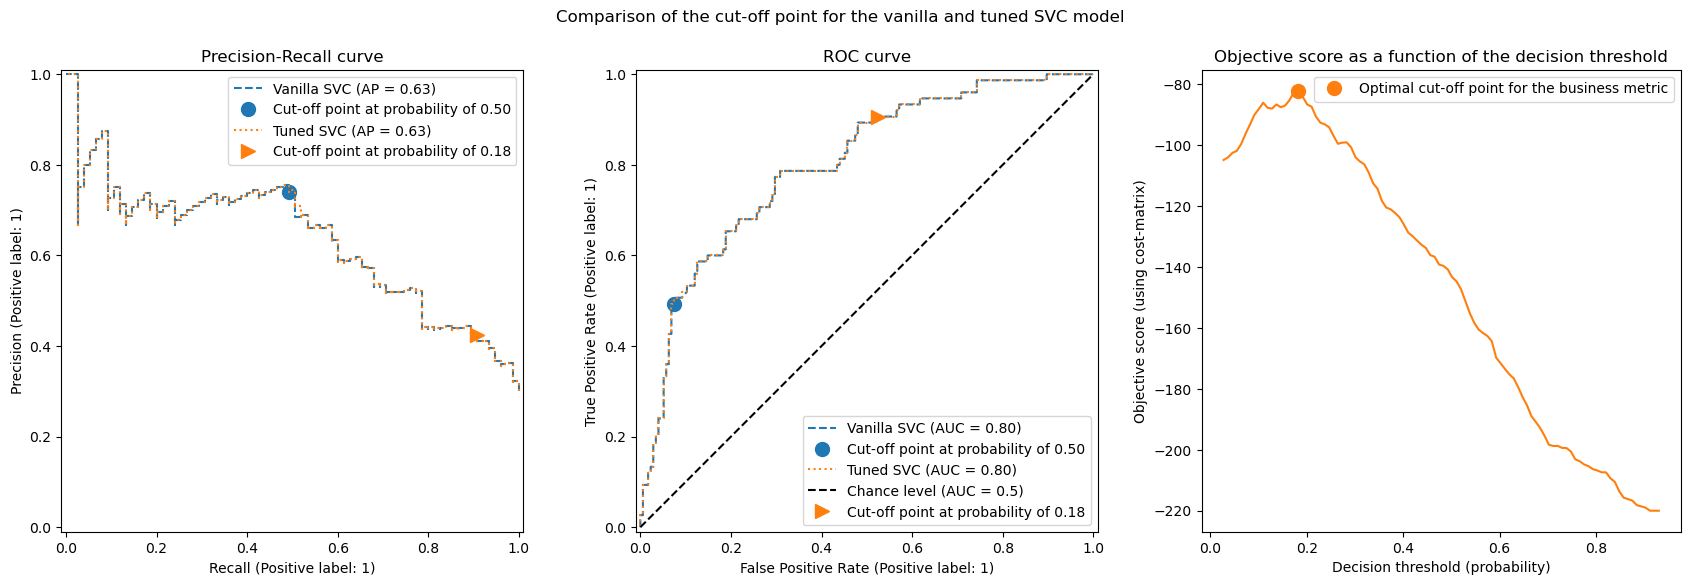

In [182]:
title = "Comparison of the cut-off point for the vanilla and tuned SVC model"
plot_roc_pr_curves(model, tuned_model, title=title)

In [186]:
print(f"Business defined metric: {scoring['credit_gain'](tuned_model, X_test, y_test)}")

Business defined metric: -127


## Бизнес метрика в деньгах

In [191]:
credit_card = fetch_openml(data_id=1597, as_frame=True, parser="pandas")
credit_card.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   V1      284807 non-null  float64 
 1   V2      284807 non-null  float64 
 2   V3      284807 non-null  float64 
 3   V4      284807 non-null  float64 
 4   V5      284807 non-null  float64 
 5   V6      284807 non-null  float64 
 6   V7      284807 non-null  float64 
 7   V8      284807 non-null  float64 
 8   V9      284807 non-null  float64 
 9   V10     284807 non-null  float64 
 10  V11     284807 non-null  float64 
 11  V12     284807 non-null  float64 
 12  V13     284807 non-null  float64 
 13  V14     284807 non-null  float64 
 14  V15     284807 non-null  float64 
 15  V16     284807 non-null  float64 
 16  V17     284807 non-null  float64 
 17  V18     284807 non-null  float64 
 18  V19     284807 non-null  float64 
 19  V20     284807 non-null  float64 
 20  V21     284807 non-null  f

In [195]:
columns_to_drop = ["Class"]
data = credit_card.frame.drop(columns=columns_to_drop)
target = credit_card.frame["Class"].astype(int)

target.value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [197]:
target.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

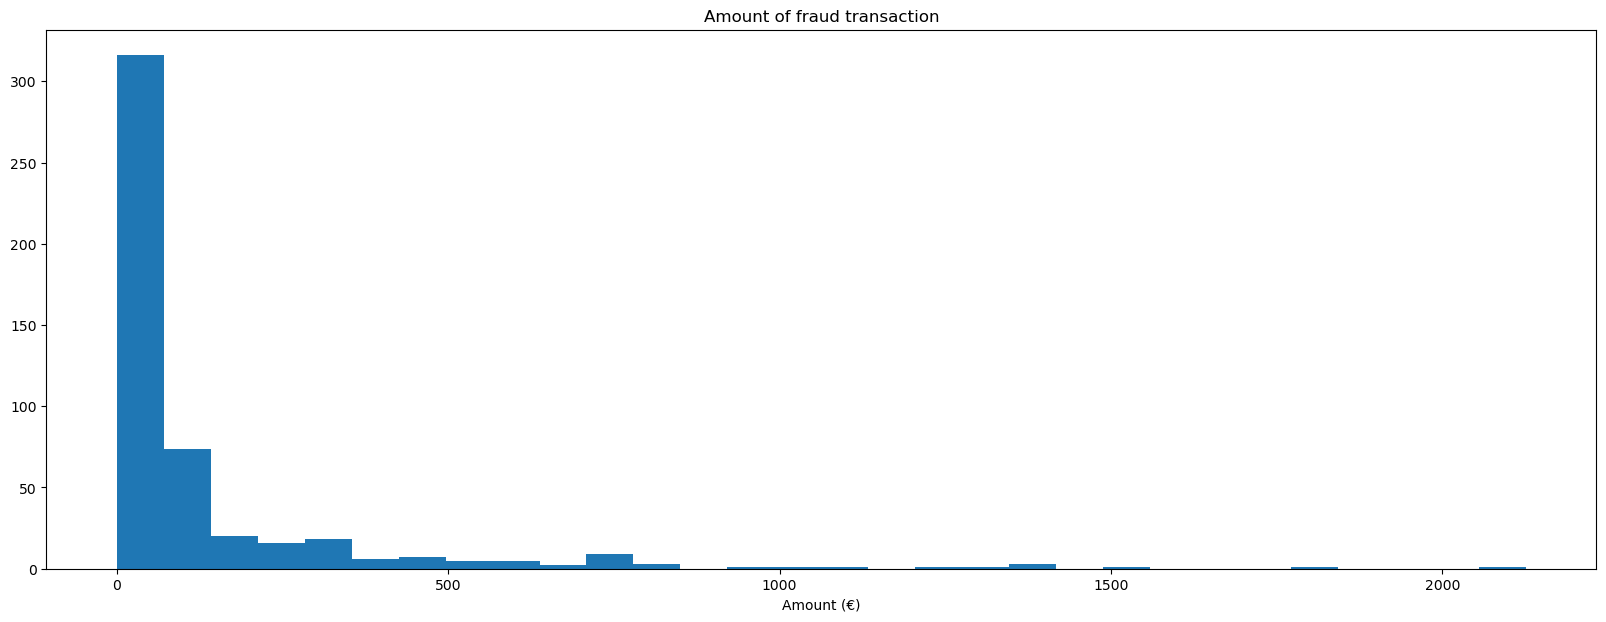

In [203]:
fraud = target == 1
amount_fraud = data["Amount"][fraud]
_, ax = plt.subplots(figsize = (20,7))
ax.hist(amount_fraud, bins=30)
ax.set_title("Amount of fraud transaction")
_ = ax.set_xlabel("Amount (€)")

Содадаим бизнес-метрику, которая зависит от суммы каждой транзакции. 
Давайте определим матрицу ошибок. При этом введем количественные значения для каждого шага 
- принятие законной транзакции обеспечивает прибыль в размере 2% от суммы транзакции.
- принятие мошеннической транзакции приводит к потере суммы транзакции.

Ввыгоды и убытки, связанные с отказами (от мошеннических и законных транзакций), не так просто определить. Здесь мы определяем, что отказ от законной транзакции оценивается как потеря в размере 5 евро, в то время как отказ от мошеннической транзакции оценивается как выигрыш в размере 50 евро. Таким образом, мы определяем следующую функцию для расчета общей выгоды от данного решения:

In [214]:
def business_metric(y_true, y_pred, amount):
    mask_true_positive = (y_true == 1) & (y_pred == 1)
    mask_true_negative = (y_true == 0) & (y_pred == 0)
    mask_false_positive = (y_true == 0) & (y_pred == 1)
    mask_false_negative = (y_true == 1) & (y_pred == 0)
    fraudulent_refuse = mask_true_positive.sum() * 50
    fraudulent_accept = -amount[mask_false_negative].sum()
    legitimate_refuse = mask_false_positive.sum() * -5
    legitimate_accept = (amount[mask_true_negative] * 0.02).sum()
    return fraudulent_refuse + fraudulent_accept + legitimate_refuse + legitimate_accept

На основе этой бизнес-метрики мы создаем `scikit-learn` свой scorer, который, используя подходящий классификатор и набор тестов, вычисляет бизнес-метрику. В этой связи мы используем `make_scorer`. Переменная `amount` - это дополнительные метаданные, которые должны быть переданы счетчику, и нам необходимо использовать маршрутизацию метаданных, чтобы учесть эту информацию.

In [222]:
sklearn.set_config(enable_metadata_routing=True)
business_scorer = make_scorer(business_metric).set_score_request(amount=True)

Итак, на данном этапе мы видим, что сумма транзакции используется дважды: один раз как функция для обучения нашей прогностической модели и один раз как метаданные для вычисления бизнес-показателя и, следовательно, статистической производительности нашей модели. 

При использовании в качестве функционала от нас требуется только наличие столбца в данных, содержащего сумму каждой транзакции. Чтобы использовать эту информацию в качестве метаданных, нам нужна внешняя переменная, которую мы можем передать счетчику, или модель, которая внутренне направляет эти метаданные счетчику. Итак, давайте создадим эту переменную.

In [225]:
amount = credit_card.frame["Amount"].to_numpy()
amount

array([149.62,   2.69, 378.66, ...,  67.88,  10.  , 217.  ])

In [227]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test, amount_train, amount_test = (
    train_test_split(
        data, target, amount, stratify=target, test_size=0.5, random_state=42
    )
)

Напомним, что класс “0” - это класс обоснованных транзакций, а класс “1” - класс мошеннических транзакций.

In [230]:
from sklearn.dummy import DummyClassifier

always_accept_policy = DummyClassifier(strategy="constant", constant=0)
always_accept_policy.fit(data_train, target_train)
benefit = business_scorer(
    always_accept_policy, data_test, target_test, amount=amount_test
)
print(f"Benefit of the 'always accept' policy: {benefit:,.2f}€")

Benefit of the 'always accept' policy: 221,445.07€


Политика, которая рассматривает все транзакции как законные, принесла бы прибыль в размере около 220 000 евро. Мы проводим аналогичную оценку для классификатора, который определяет все транзакции как мошеннические.

In [235]:
always_reject_policy = DummyClassifier(strategy="constant", constant=1)
always_reject_policy.fit(data_train, target_train)
benefit = business_scorer(
    always_reject_policy, data_test, target_test, amount=amount_test
)
print(f"Benefit of the 'always reject' policy: {benefit:,.2f}€")

Benefit of the 'always reject' policy: -698,490.00€


Прдобный подход повлечет за собой катастрофические убытки: около 700 000 евро. Это ожидаемо, поскольку подавляющее большинство транзакций являются законными, и банк будет отказывать в них по неправильным причинам.

Прогностическая модель, которая адаптирует решения о принятии/отклонении для каждой транзакции, в идеале должна позволить нам получать прибыль, превышающую 220 000 евро при использовании наилучшей из наших постоянных базовых политик.

Подберем модель логистической регрессии с порогом принятия решения по умолчанию, равным 0,5. 

Здесь мы настраиваем гиперпараметр `C` логистической регрессии с помощью минимизации log_loss, чтобы гарантировать вероятностные прогнозы модели, возвращаемые ее методом predict_proba, являются максимально точными, независимо от выбора метода. Затем подберем значение порога принятия решения.

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {"logisticregression__C": np.logspace(-6, 6, 13)}
model = GridSearchCV(logistic_regression, param_grid, scoring="neg_log_loss").fit(
    data_train, target_train
)
model

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])},
             scoring='neg_log_loss')

In [239]:
print(
    "Benefit of logistic regression with default threshold: "
    f"{business_scorer(model, data_test, target_test, amount=amount_test):,.2f}€"
)

Benefit of logistic regression with default threshold: 244,919.87€


Оптимизируем порог принятия решения

In [247]:
tuned_model = TunedThresholdClassifierCV(
    estimator=model.best_estimator_,
    scoring=business_scorer,
    thresholds=100,
    n_jobs=-1,
)

Поскольку нашему бизнес-оценщику требуется сумма каждой транзакции, нам необходимо передать эту информацию с помощью метода `fit`. TunedThresholdClassifierCV отвечает за автоматическую отправку этих метаданных базовому оценщику.

In [250]:
tuned_model.fit(data_train, target_train, amount=amount_train)

TunedThresholdClassifierCV(estimator=Pipeline(steps=[('standardscaler',
                                                      StandardScaler()),
                                                     ('logisticregression',
                                                      LogisticRegression(C=100.0))]),
                           n_jobs=-1,
                           scoring=make_scorer(business_metric, response_method='predict'))

In [252]:
print(f"Tuned decision threshold: {tuned_model.best_threshold_:.2f}")

Tuned decision threshold: 0.03


In [254]:
print(
    "Benefit of logistic regression with a tuned threshold: "
    f"{business_scorer(tuned_model, data_test, target_test, amount=amount_test):,.2f}€"
)

Benefit of logistic regression with a tuned threshold: 249,433.39€


In [261]:
tuned_model.best_threshold_

0.03030303030292765

Финализируем модель, используя порог принятия решения, найденный в предыдущем разделе, чтобы создать новую модель и проверить, дает ли она те же результаты.

In [264]:
from sklearn.model_selection import FixedThresholdClassifier

model_fixed_threshold = FixedThresholdClassifier(
    estimator=model, threshold=0.03
).fit(data_train, target_train)

business_score = business_scorer(
    model_fixed_threshold, data_test, target_test, amount=amount_test
)
print(f"Benefit of logistic regression with a tuned threshold:  {business_score:,.2f}€")

Benefit of logistic regression with a tuned threshold:  249,433.39€
